In [1]:
Title: My Title
Authors : 
  "Author1": 
  "Author2":

SyntaxError: invalid syntax (4079449434.py, line 1)

In [2]:
import numpy as np
import pandas as pd


import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt


import random 
from tqdm.auto import tqdm

import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

<hr>
<h2>Description</h2>
<p>Le jeu de données contenu dans train.csv décrit des candidatures au poste de
chercheur d’or chez OrFée.<br>

<p>Le jeu de données comporte 12 colonnes :<br>
• <b>id</b>  : identifiant unique de chaque ligne<br>
• <b>date</b>  : date de la candidature<br>
•  <b>age</b>: âge du candidat<br>
•  <b>diplome</b>: plus haut diplôme obtenu (bac, licence, master, doctorat)<br>
• <b>specialite</b> : spécialité du diplôme (géologie, forage, détective, archéologie, . . . )<br>
• <b>salaire</b>: salaire demandé<br>
• <b>dispo</b>: oui : disponibilité immédiate, non : pas disponible immédiatement<br>
• <b>sexe</b>: féminin (F) ou masculin (M)<br>
• <b>exp</b> : nombre d’années d’expérience<br>
• <b>cheveux</b> : couleur des cheveux (châtain, brun, blond, roux)<br>
• <b>note</b> : note (sur 100) obtenue à l’exercice de recherche d’or<br>
• <b>embauche</b> : le candidat a-t-il été embauché ? (0 : non, 1 : oui) <br>

In [3]:
df = pd.read_csv(r'../data/data.csv',sep=',')
df.shape

(20000, 11)

In [4]:
df.sample(5)

,date,cheveux,age,exp,salaire,sexe,diplome,specialite,note,dispo,embauche
6332,05/06/2012,blond,41.0,5.0,33105.0,M,licence,forage,62.98,non,0
9731,14/05/2010,blond,29.0,9.0,39952.0,F,licence,forage,88.85,oui,1
10898,25/08/2013,blond,26.0,15.0,33201.0,M,master,detective,82.59,oui,0
3960,17/09/2014,brun,32.0,19.0,40020.0,M,master,detective,72.86,oui,0
202,08/05/2012,chatain,53.0,9.0,34831.0,M,doctorat,geologie,86.12,oui,0


In [5]:
df.columns

Index(['date', 'cheveux', 'age', 'exp', 'salaire', 'sexe', 'diplome',
       'specialite', 'note', 'dispo', 'embauche'],
      dtype='object')

# <span style="color:#011C5D">Analyse descriptive </span>

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        19909 non-null  object 
 1   cheveux     19895 non-null  object 
 2   age         19909 non-null  object 
 3   exp         19904 non-null  object 
 4   salaire     19905 non-null  object 
 5   sexe        19900 non-null  object 
 6   diplome     19891 non-null  object 
 7   specialite  19907 non-null  object 
 8   note        19886 non-null  float64
 9   dispo       19894 non-null  object 
 10  embauche    20000 non-null  int64  
dtypes: float64(1), int64(1), object(9)
memory usage: 1.7+ MB


### <span style="color:#011C5D">1. Identifier les variables numeriques et categorielles </span>

In [4]:
# EXERCICE : 

# Identifions tout d'abord les colonnes catégorielles
col_categoricals = df.select_dtypes(include=['object'])

# Puis les numériques
col_numericals = df.select_dtypes(include=['number'])


print(f"Liste des colonnes catégorielles :\n{col_categoricals}")
print(f"\nListe des colonnes numériques :\n{col_numericals}")

Liste des colonnes catégorielles :
             date  cheveux   age   exp  salaire sexe   diplome specialite  \
0      02/06/2012     roux  25.0   9.0  26803.0    F   licence   geologie   
1      21/04/2011    blond  35.0  13.0  38166.0    M   licence     forage   
2      07/09/2012    blond  29.0  13.0  35207.0    M   licence   geologie   
3      01/07/2011     brun   NaN  12.0  32442.0    M   licence   geologie   
4      07/08/2012     roux  35.0   6.0  28533.0    F   licence  detective   
...           ...      ...   ...   ...      ...  ...       ...        ...   
19995  10/03/2012     roux  47.0   9.0  35723.0    M   licence   geologie   
19996  19/09/2010  chatain  38.0  10.0  33570.0    F    master   geologie   
19997  02/09/2010  chatain  23.0   6.0  33751.0    F  doctorat  detective   
19998  06/12/2011  chatain  33.0  11.0  34167.0    F   licence  detective   
19999  29/11/2010     brun  35.0  14.0  44499.0    M       bac   geologie   

      dispo  
0       non  
1       non 

In [5]:
col_numericals=["age","exp","salaire","note"]

In [6]:
# Convertir les données numerique au bon format "SI BESOIN"
#### CODEZ-ICI ####
df["date"]=pd.to_datetime(df["date"],format="%d/%m/%Y")

In [7]:
df["age"]=pd.to_numeric(df["age"],errors='coerce').astype('Int64')
df["exp"]=pd.to_numeric(df["exp"],errors='coerce').astype('Int64')
df["salaire"]=pd.to_numeric(df["salaire"],errors='coerce').astype('float')
df["note"]=pd.to_numeric(df["note"],errors='coerce').astype('float')
df["embauche"]=df["embauche"].astype('bool')

In [8]:
df["dispo"]=df["dispo"].astype('bool')

In [12]:
col_numericals

['age', 'exp', 'salaire', 'note']

### <span style="color:#011C5D">2. Analyse de la distribution des variables numeriques </span>

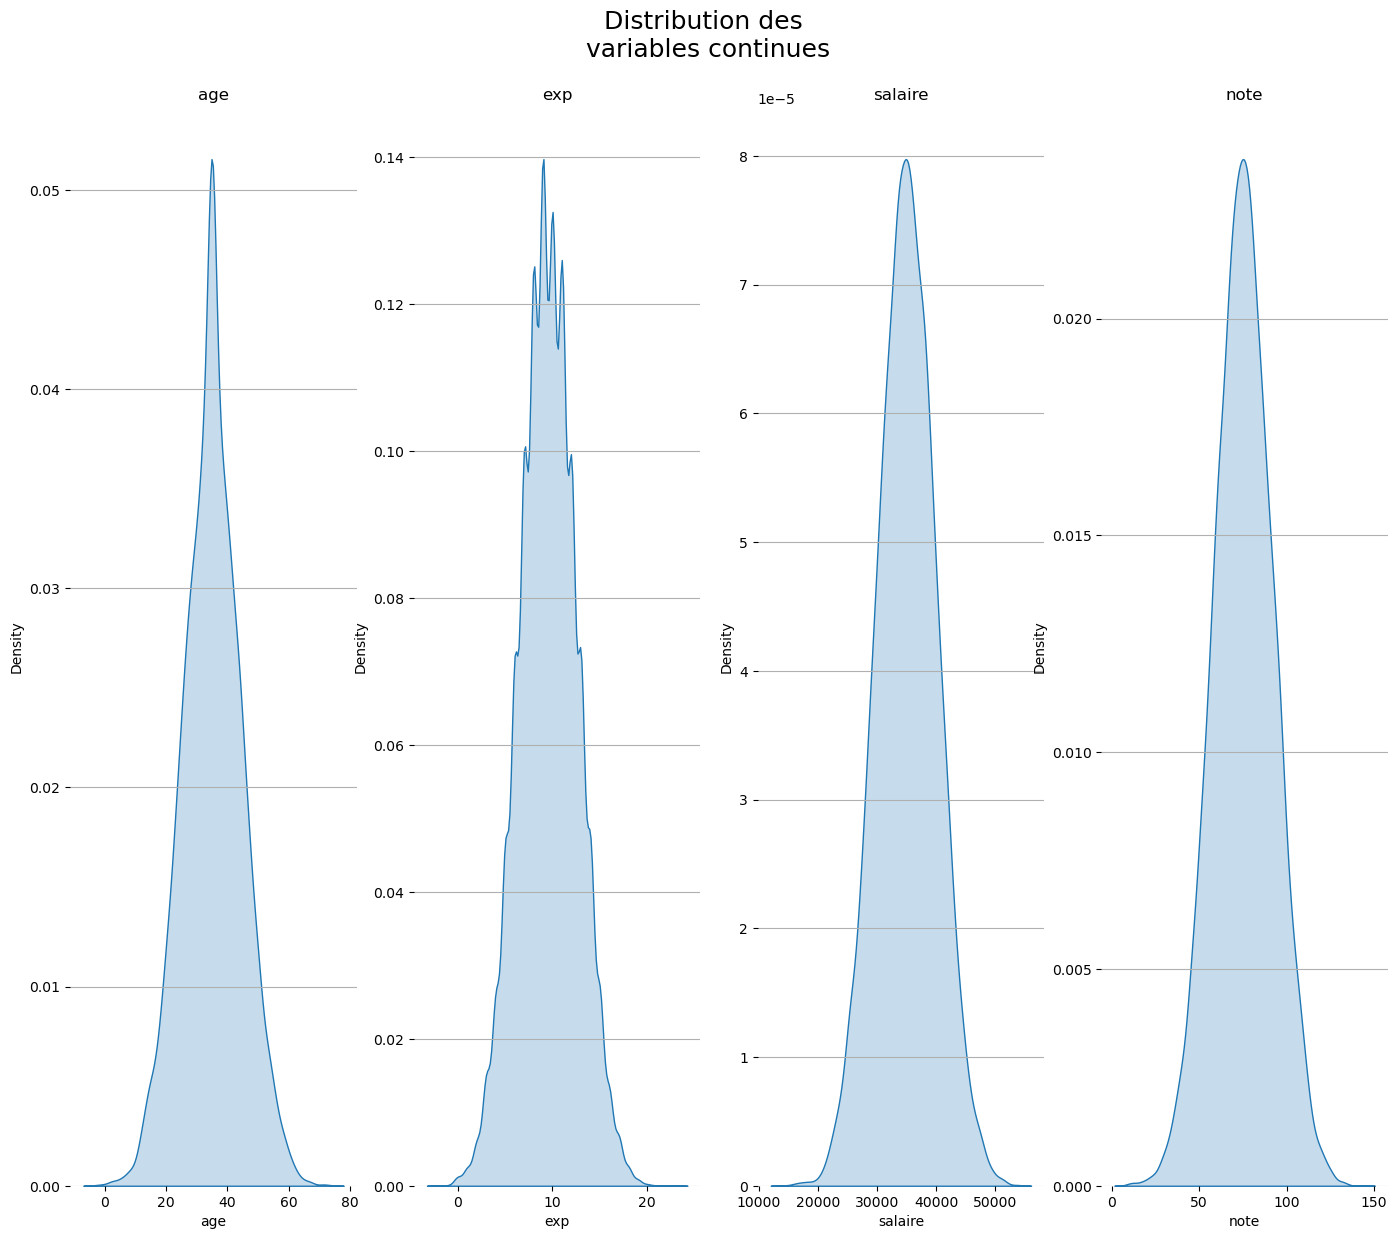

In [9]:
ncols = 4
nrows = len(col_numericals) // ncols + (len(col_numericals) % ncols > 0)
 
plt.figure(figsize=(17, 14))
plt.subplots_adjust(hspace=1)
plt.suptitle("Distribution des \nvariables continues", fontsize=18, y=0.95)
 
for n, variable in enumerate(col_numericals):
    # add a new subplot iteratively
    ax = plt.subplot(nrows, ncols, n + 1)
 
    sns.kdeplot(ax=ax, data=df[variable].dropna(), legend=None, fill=True)
    ax.grid(True, which='major', axis='y')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    
    ax.set_title(variable, loc= 'center', fontsize=12)

### <span style="color:#011C5D">3. Matrice de correlation </span>

<Axes: >

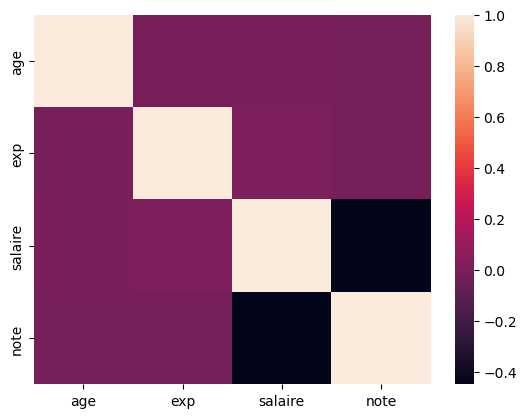

In [10]:
# EXERCICE : 

# Calculer la correlation entre les variables numeriques

matrice_corr = df[col_numericals].corr()

# Afficher un heatmap de la matrice de correlation 
sns.heatmap(matrice_corr)



# Que pouvez-vous conclure ?


### <span style="color:#011C5D">4. Identification des valeurs manquantes </span>

In [11]:
# EXERCICE : Laissez libre court à votre créativité et créez une fonction qui affiche le taux
#            de valeurs manquantes de chaque variable pour chaque type (catégorielle et numérique)
#            par ordre décroissant


def display_missing_values(df):
    missing = df.isnull().mean() * 100
    missing = missing[missing > 0].sort_values(ascending=False)
    print("\n Taux de valeurs manquantes (%):\n", missing)


#### CODEZ-ICI ####



# Que pouvez-vous conclure ?

In [16]:
print(display_missing_values(df))


📊 Taux de valeurs manquantes (%):
 note          0.570
diplome       0.545
exp           0.530
cheveux       0.525
salaire       0.525
age           0.505
sexe          0.500
specialite    0.465
date          0.455
dtype: float64
None


### <span style="color:#011C5D">5. Imputation des valeurs manquantes </span>

#### <span style="color:#011C5D">5.1 Variables numeriques </span>

##### <span style="color:#011C5D">5.1.1 Imputation par la moyenne </span>

In [20]:
df

,date,cheveux,age,exp,salaire,sexe,diplome,specialite,note,dispo,embauche,age_imp,exp_imp,salaire_imp,note_imp,age_imputation_regression,exp_imputation_regression,salaire_imputation_regression,note_imputation_regression
0,2012-06-02,roux,25,9,26803.0,F,licence,geologie,97.08,True,False,25.000000,9.0,26803.0,97.08,25.000000,9.0,26803.0,97.08
1,2011-04-21,blond,35,13,38166.0,M,licence,forage,63.86,True,False,35.000000,13.0,38166.0,63.86,35.000000,13.0,38166.0,63.86
2,2012-09-07,blond,29,13,35207.0,M,licence,geologie,78.50,True,False,29.000000,13.0,35207.0,78.50,29.000000,13.0,35207.0,78.50
3,2011-07-01,brun,<NA>,12,32442.0,M,licence,geologie,45.09,True,False,35.004473,12.0,32442.0,45.09,35.144619,12.0,32442.0,45.09
4,2012-08-07,roux,35,6,28533.0,F,licence,detective,81.91,True,False,35.000000,6.0,28533.0,81.91,35.000000,6.0,28533.0,81.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2012-03-10,roux,47,9,35723.0,M,licence,geologie,66.47,True,False,47.000000,9.0,35723.0,66.47,47.000000,9.0,35723.0,66.47
19996,2010-09-19,chatain,38,10,33570.0,F,master,geologie,62.29,True,True,38.000000,10.0,33570.0,62.29,38.000000,10.0,33570.0,62.29
19997,2010-09-02,chatain,23,6,33751.0,F,doctorat,detective,103.48,True,False,23.000000,6.0,33751.0,103.48,23.000000,6.0,33751.0,103.48
19998,2011-12-06,chatain,33,11,34167.0,F,licence,detective,73.35,True,False,33.000000,11.0,34167.0,73.35,33.000000,11.0,34167.0,73.35


In [ ]:
##### ICI je fais le changement de variables "", mais, si tu d'autres idées
#On le change :)
df['cheveux'].unique()
df['cheveux'] = df['cheveux'].replace(' ', 'chauve')
df['cheveux'].unique()


array(['roux', 'blond', 'brun', 'chatain', nan, 'chauve'], dtype=object)

In [27]:
df['sexe'].unique()
df['sexe'] = df['sexe'].replace(' ', np.nan)
df['sexe'].unique()

array(['F', 'M', nan], dtype=object)

In [29]:
df['diplome'].unique()
df['diplome'] = df['diplome'].replace(' ', np.nan)
df['sexe'].unique()

array(['F', 'M', nan], dtype=object)

In [31]:
df['specialite'].unique()
df['specialite'] = df['specialite'].replace(' ', np.nan)
df['specialite'].unique()

array(['geologie', 'forage', 'detective', 'archeologie', nan],
      dtype=object)

In [13]:
# EXERCICE : Imputation des variables numériques avec la moyenne
# Les variables imputées sont enregistrées dans de nouvelles colonnes.

df[[c + '_imp' for c in col_numericals]] = df[col_numericals].apply(
    lambda s: s.astype(float).fillna(s.mean())
)

##### <span style="color:#011C5D">5.1.2 Imputation par la regression </span>

In [116]:
#EXERCICE : Imputation par régression
# Laissez libre cours à votre créativité !
# Pour chaque variable numérique contenant des valeurs manquantes, utilisez les variables explicatives appropriées afin d’imputer les valeurs manquantes à l’aide d’une méthode de régression.



In [14]:
import pandas as pd
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression

def impute_by_regression(df, columns_to_impute):

    
    # Keep only selected columns
    df_selected = df[columns_to_impute]
    
    # Imputer setup
    imputer = IterativeImputer(estimator=LinearRegression(), random_state=0)
    df_imputed = pd.DataFrame(
        imputer.fit_transform(df_selected),
        columns=df_selected.columns,
        index=df.index
    )
    
    # Add new columns with suffix only for the ones imputed
    for col in columns_to_impute:
        df[f"{col}_imputation_regression"] = df_imputed[col]
    
    return df


In [15]:
df = impute_by_regression(df, col_numericals)


In [16]:
df

,date,cheveux,age,exp,salaire,sexe,diplome,specialite,note,dispo,embauche,age_imp,exp_imp,salaire_imp,note_imp,age_imputation_regression,exp_imputation_regression,salaire_imputation_regression,note_imputation_regression
0,2012-06-02,roux,25,9,26803.0,F,licence,geologie,97.08,True,False,25.000000,9.0,26803.0,97.08,25.000000,9.0,26803.0,97.08
1,2011-04-21,blond,35,13,38166.0,M,licence,forage,63.86,True,False,35.000000,13.0,38166.0,63.86,35.000000,13.0,38166.0,63.86
2,2012-09-07,blond,29,13,35207.0,M,licence,geologie,78.50,True,False,29.000000,13.0,35207.0,78.50,29.000000,13.0,35207.0,78.50
3,2011-07-01,brun,<NA>,12,32442.0,M,licence,geologie,45.09,True,False,35.004473,12.0,32442.0,45.09,35.144619,12.0,32442.0,45.09
4,2012-08-07,roux,35,6,28533.0,F,licence,detective,81.91,True,False,35.000000,6.0,28533.0,81.91,35.000000,6.0,28533.0,81.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2012-03-10,roux,47,9,35723.0,M,licence,geologie,66.47,True,False,47.000000,9.0,35723.0,66.47,47.000000,9.0,35723.0,66.47
19996,2010-09-19,chatain,38,10,33570.0,F,master,geologie,62.29,True,True,38.000000,10.0,33570.0,62.29,38.000000,10.0,33570.0,62.29
19997,2010-09-02,chatain,23,6,33751.0,F,doctorat,detective,103.48,True,False,23.000000,6.0,33751.0,103.48,23.000000,6.0,33751.0,103.48
19998,2011-12-06,chatain,33,11,34167.0,F,licence,detective,73.35,True,False,33.000000,11.0,34167.0,73.35,33.000000,11.0,34167.0,73.35


##### <span style="color:#011C5D">5.1.3 Comparer la distribution des variables imputer </span>

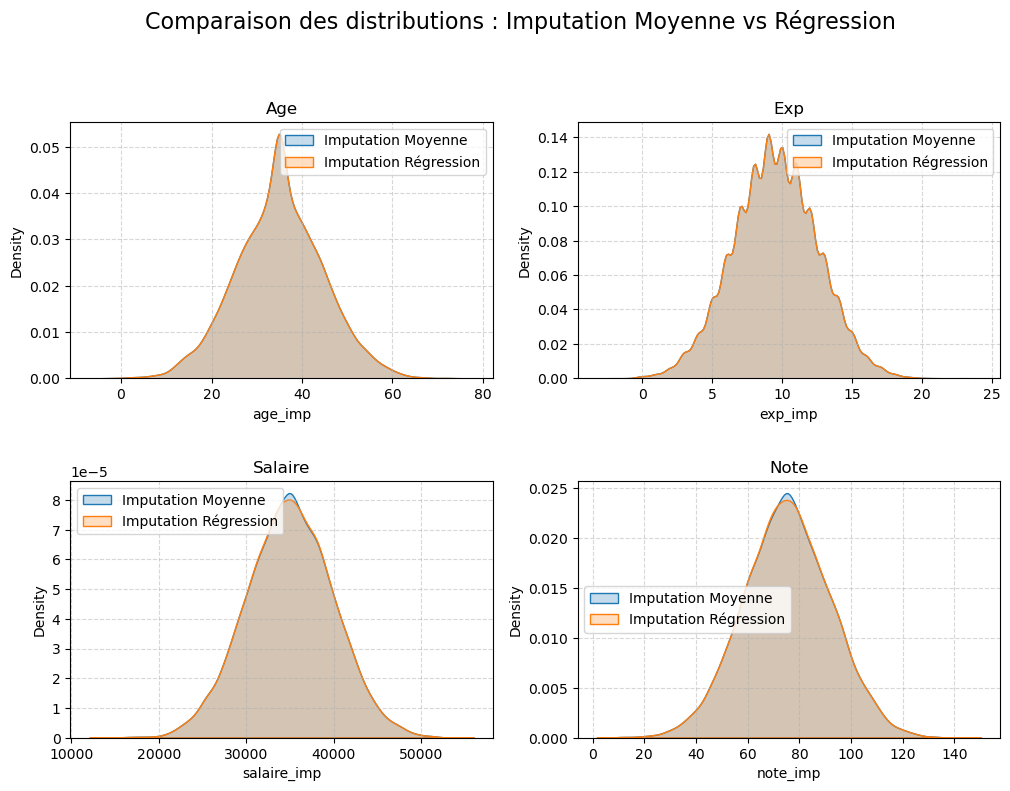

In [18]:
# EXERCICE : Laissez libre court à votre créativité 
# Pour chaque variable numerique
# Comparer la distribution entre l'imputation par la moyenne et l'imputation par Regression

variables = ["age", "exp", "salaire", "note"]

plt.figure(figsize=(12, 8))
plt.suptitle("Comparaison des distributions : Imputation Moyenne vs Régression", fontsize=16, y=1.02)
plt.subplots_adjust(hspace=0.4)
for i, var in enumerate(variables, 1):
    plt.subplot(2, 2, i)
    sns.kdeplot(df[f"{var}_imp"], fill=True, label="Imputation Moyenne")
    sns.kdeplot(df[f"{var}_imputation_regression"], fill=True, label="Imputation Régression")
    plt.title(var.capitalize())
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.5)

plt.show()

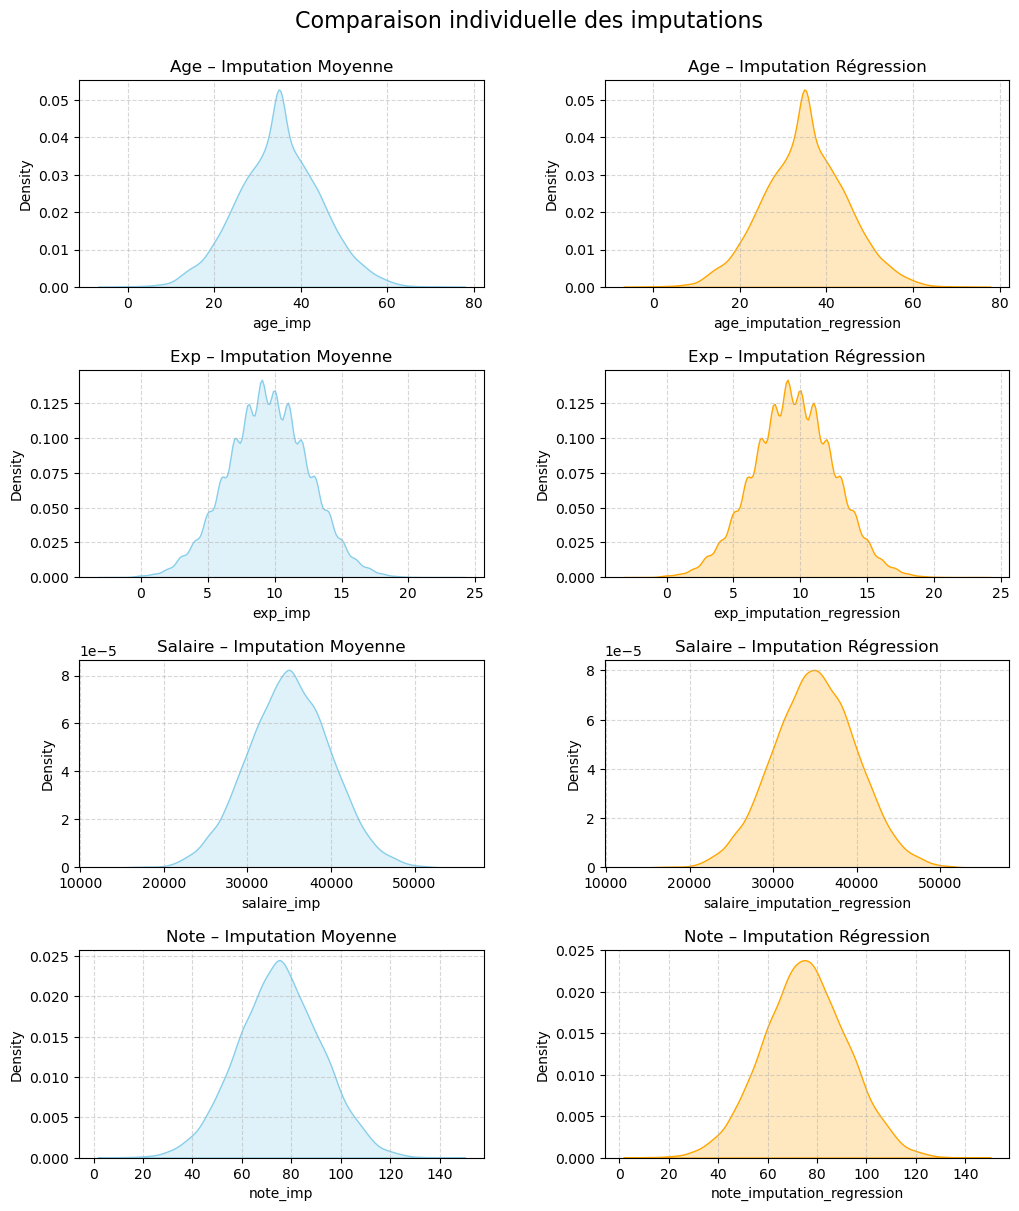

In [19]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 14))
fig.suptitle("Comparaison individuelle des imputations", fontsize=16, y=0.93)
fig.subplots_adjust(hspace=0.4, wspace=0.3)
for i, var in enumerate(variables):
    # Left: mean imputation
    sns.kdeplot(df[f"{var}_imp"], fill=True, ax=axes[i, 0], color="skyblue")
    axes[i, 0].set_title(f"{var.capitalize()} – Imputation Moyenne")
    axes[i, 0].grid(True, linestyle="--", alpha=0.5)
    
    # Right: regression imputation
    sns.kdeplot(df[f"{var}_imputation_regression"], fill=True, ax=axes[i, 1], color="orange")
    axes[i, 1].set_title(f"{var.capitalize()} – Imputation Régression")
    axes[i, 1].grid(True, linestyle="--", alpha=0.5)

plt.show()

In [ ]:
# Que pouvez-vous conclure ?

#Pour les variables age et exp : les deux méthodes d'imputation produisent des distributions similaires
#pour les variables salaire et note : l'imputation par régression semble mieux capturer la distribution originale, tandis que l'imputation par la moyenne tend à lisser les variations et à sous-estimer la variance.

#### <span style="color:#011C5D">5.2 Variables categorielles </span>

In [23]:
# EXERCICE : Utiliser une methode adequate pour imputer les variables categorielles
# Les variables imputées sont enregistrées dans de nouvelles colonnes.

def impute_categorical_random_newcols(df, cols):
    np.random.seed(0)  # pour un résultat reproductible
    for col in cols:
        # créer une nouvelle colonne
        new_col = f"{col}_imputation_random"
        df[new_col] = df[col].copy()

        # repérer les valeurs manquantes
        missing_idx = df[new_col].isna()

        # imputer par tirage aléatoire parmi les valeurs existantes
        df.loc[missing_idx, new_col] = np.random.choice(df[new_col].dropna(), size=missing_idx.sum(), replace=True)
    
    return df



# La methode est :Repérer les lignes où la variable catégorielle est manquante., Choisir aléatoirement une valeur déjà existante dans cette même colonne (parmi les valeurs non manquantes).
#Remplacer les valeurs manquantes par ces tirages aléatoires.
#Tu peux le changer si tu veux :3
categorical_cols = ["cheveux", "diplome", "specialite"]
df = impute_categorical_random_newcols(df, categorical_cols)

In [24]:
col_numericals

['age', 'exp', 'salaire', 'note']

### <span style="color:#011C5D">6. Detection des outliers </span>

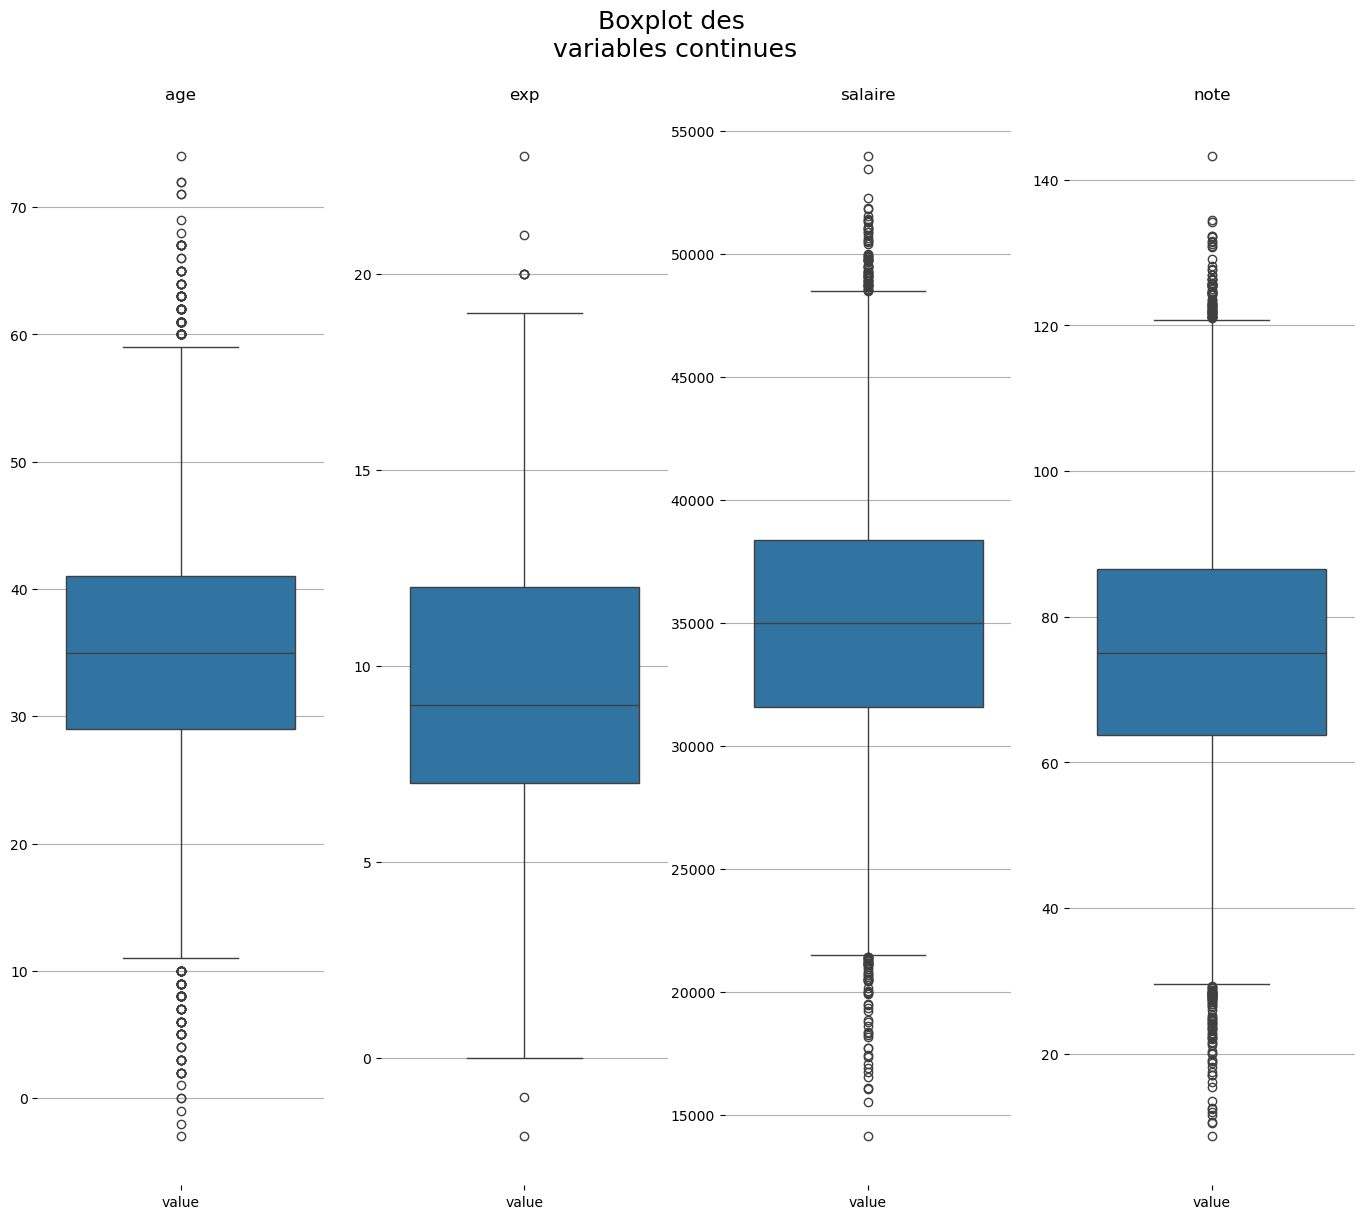

In [25]:
# On affiche les boxplots
temp=pd.melt(df[col_numericals].reset_index(), id_vars='index', value_vars=col_numericals).iloc[:,-2:]
 
ncols = 4
nrows = len(col_numericals) // ncols + (len(col_numericals) % ncols > 0)
 
plt.figure(figsize=(17, 14))
plt.subplots_adjust(hspace=1)
plt.suptitle("Boxplot des \nvariables continues", fontsize=18, y=0.95)
 
for n, variable in enumerate(col_numericals):
    # add a new subplot iteratively
    ax = plt.subplot(nrows, ncols, n + 1)
 
    sns.boxplot(ax=ax, data=temp[temp['variable']==variable], orient='v')
    #sns.kdeplot(ax=ax, data=temp[temp['variable']==variable], legend=None, palette=customPalette, shade=True)
    ax.grid(True, which='major', axis='y')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    
    ax.set_title(variable, loc= 'center', fontsize=12)

In [26]:
# EXERCICE : Completer cette fonction qui retourne 0 ou 1 si la valeur observée est outlier ou pas 

def is_outlier(df,column) :
    
    # 1er Quartile 
    Q1 = df[column].quantile(0.25)
    
    # 3ème Quartile 
    Q3 = df[column].quantile(0.75)
    
    # Inter-Quartile Range (IQR)
    IQR = Q3 - Q1
    
    # limites, basse & haute
    limite_inf = Q1 - 1.5 * IQR
    limite_sup = Q3 + 1.5 * IQR
    
    # Remplace les données inférieur et supérieur à la limite par 1 et les autres par 0
    series =  ((df[column] < limite_inf) | (df[column] > limite_sup)).astype(float)
    
    return series

In [27]:
# EXERCICE : Appliquer votre fonction aux variables numeriques

df['outlier_age'] = is_outlier(df, 'age')
df['outlier_exp'] = is_outlier(df, 'exp')
df['outlier_salaire'] = is_outlier(df, 'salaire')
df['outlier_note'] = is_outlier(df, 'note')

In [28]:
df.columns


Index(['date', 'cheveux', 'age', 'exp', 'salaire', 'sexe', 'diplome',
       'specialite', 'note', 'dispo', 'embauche', 'age_imp', 'exp_imp',
       'salaire_imp', 'note_imp', 'age_imputation_regression',
       'exp_imputation_regression', 'salaire_imputation_regression',
       'note_imputation_regression', 'cheveux_imputation_random',
       'diplome_imputation_random', 'specialite_imputation_random',
       'outlier_age', 'outlier_exp', 'outlier_salaire', 'outlier_note'],
      dtype='object')

In [29]:
df["outlier_note"].value_counts()


outlier_note
0.0    19851
1.0      149
Name: count, dtype: int64

In [64]:
df["outlier_exp"].value_counts()

outlier_exp
0.0    19886
1.0        8
Name: count, dtype: int64

In [62]:
df["outlier_age"].value_counts()


outlier_age
0.0    19684
1.0      215
Name: count, dtype: int64

In [63]:
df["outlier_salaire"].value_counts()

outlier_salaire
0.0    19877
1.0      123
Name: count, dtype: int64

In [ ]:
# Que pouvez-vous conclure ?

# La variable avec le plus d'outliers est la variable age, et   # la variable avec le moins d'outliers est la variable exp
#La variable age contient de problemes des qu'il y a des age negatif, qui n'a pas de sens

In [ ]:
# EXERCICE : Laissez libre court à votre créativité et créez une fonction qui affiche le taux et nombre
#            de valeurs manquantes de chaque variable
#            par ordre décroissant



In [ ]:
def display_missing_values_Sec(df):
    missing = (
        df.isnull().sum()
        .to_frame("nb_valeurs_manquantes")
        .assign(taux=lambda x: x["nb_valeurs_manquantes"] / len(df) * 100)
        .query("nb_valeurs_manquantes > 0")
        .sort_values("nb_valeurs_manquantes", ascending=False)
        .round(2)
    )
    return missing


In [31]:
display_missing_values(df)


,nb_valeurs_manquantes,taux
note,114,0.57
diplome,109,0.55
exp,106,0.53
outlier_exp,106,0.53
cheveux,105,0.52
salaire,105,0.52
age,101,0.50
outlier_age,101,0.50
sexe,100,0.50
specialite,93,0.46


In [32]:
df

,date,cheveux,age,exp,salaire,sexe,diplome,specialite,note,dispo,...,exp_imputation_regression,salaire_imputation_regression,note_imputation_regression,cheveux_imputation_random,diplome_imputation_random,specialite_imputation_random,outlier_age,outlier_exp,outlier_salaire,outlier_note
0,2012-06-02,roux,25,9,26803.0,F,licence,geologie,97.08,True,...,9.0,26803.0,97.08,roux,licence,geologie,0.0,0.0,0.0,0.0
1,2011-04-21,blond,35,13,38166.0,M,licence,forage,63.86,True,...,13.0,38166.0,63.86,blond,licence,forage,0.0,0.0,0.0,0.0
2,2012-09-07,blond,29,13,35207.0,M,licence,geologie,78.50,True,...,13.0,35207.0,78.50,blond,licence,geologie,0.0,0.0,0.0,0.0
3,2011-07-01,brun,<NA>,12,32442.0,M,licence,geologie,45.09,True,...,12.0,32442.0,45.09,brun,licence,geologie,NaN,0.0,0.0,0.0
4,2012-08-07,roux,35,6,28533.0,F,licence,detective,81.91,True,...,6.0,28533.0,81.91,roux,licence,detective,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2012-03-10,roux,47,9,35723.0,M,licence,geologie,66.47,True,...,9.0,35723.0,66.47,roux,licence,geologie,0.0,0.0,0.0,0.0
19996,2010-09-19,chatain,38,10,33570.0,F,master,geologie,62.29,True,...,10.0,33570.0,62.29,chatain,master,geologie,0.0,0.0,0.0,0.0
19997,2010-09-02,chatain,23,6,33751.0,F,doctorat,detective,103.48,True,...,6.0,33751.0,103.48,chatain,doctorat,detective,0.0,0.0,0.0,0.0
19998,2011-12-06,chatain,33,11,34167.0,F,licence,detective,73.35,True,...,11.0,34167.0,73.35,chatain,licence,detective,0.0,0.0,0.0,0.0


### <span style="color:#011C5D">7. Encodage des variables categorielles </span>

In [ ]:
# EXERCICE : Utiliser une methode adequate pour encoder les variables categorielles


In [ ]:
from sklearn.preprocessing import LabelEncoder

for col in ['cheveux', 'diplome', 'specialite']:
    le = LabelEncoder()
    df[f"{col}_encoded"] = le.fit_transform(df[col].astype(str))
# On utilise label encoding pour encoder les variables categorielles

In [ ]:
df

,date,cheveux,age,exp,salaire,sexe,diplome,specialite,note,dispo,...,cheveux_imputation_random,diplome_imputation_random,specialite_imputation_random,outlier_age,outlier_exp,outlier_salaire,outlier_note,cheveux_encoded,diplome_encoded,specialite_encoded
0,2012-06-02,roux,25,9,26803.0,F,licence,geologie,97.08,True,...,roux,licence,geologie,0.0,0.0,0.0,0.0,5,3,4
1,2011-04-21,blond,35,13,38166.0,M,licence,forage,63.86,True,...,blond,licence,forage,0.0,0.0,0.0,0.0,1,3,3
2,2012-09-07,blond,29,13,35207.0,M,licence,geologie,78.50,True,...,blond,licence,geologie,0.0,0.0,0.0,0.0,1,3,4
3,2011-07-01,brun,<NA>,12,32442.0,M,licence,geologie,45.09,True,...,brun,licence,geologie,NaN,0.0,0.0,0.0,2,3,4
4,2012-08-07,roux,35,6,28533.0,F,licence,detective,81.91,True,...,roux,licence,detective,0.0,0.0,0.0,0.0,5,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2012-03-10,roux,47,9,35723.0,M,licence,geologie,66.47,True,...,roux,licence,geologie,0.0,0.0,0.0,0.0,5,3,4
19996,2010-09-19,chatain,38,10,33570.0,F,master,geologie,62.29,True,...,chatain,master,geologie,0.0,0.0,0.0,0.0,3,4,4
19997,2010-09-02,chatain,23,6,33751.0,F,doctorat,detective,103.48,True,...,chatain,doctorat,detective,0.0,0.0,0.0,0.0,3,2,2
19998,2011-12-06,chatain,33,11,34167.0,F,licence,detective,73.35,True,...,chatain,licence,detective,0.0,0.0,0.0,0.0,3,3,2


### <span style="color:#011C5D">8. Encodage des variables categorielles Embedding </span>

In [36]:
import torch
import torch.nn as nn
from sklearn.preprocessing import LabelEncoder

In [37]:
# Exemple variable
VARIABLE = "cheveux"
df[VARIABLE] = df[VARIABLE].fillna("Missing")
MODALITE = df[VARIABLE].unique()
NB_MODALITE = len(MODALITE)
NB_MODALITE,MODALITE

(6, array(['roux', 'blond', 'brun', 'chatain', 'Missing', ' '], dtype=object))

In [38]:
DIM_EMBEDDING = 6

In [39]:
# Exemple d'embedding avec des weights aleatoire non entraine sur une dataset
embedding = nn.Embedding(NB_MODALITE, DIM_EMBEDDING)

In [40]:
df[VARIABLE+"_label_encoded"] = LabelEncoder().fit_transform(df[VARIABLE])

In [41]:
df[[VARIABLE,VARIABLE+"_label_encoded"]].head()

,cheveux,cheveux_label_encoded
0,roux,5
1,blond,2
2,blond,2
3,brun,3
4,roux,5


In [42]:
variable_to_torch = torch.tensor(df[VARIABLE+"_label_encoded"].values.tolist())  

In [43]:
embeddings = embedding(variable_to_torch)

In [44]:
embeddings

tensor([[ 1.9211, -0.4882, -0.7414,  2.0086, -0.1162,  0.4693],
        [-0.3211, -0.6964,  0.0077,  0.5131, -0.2730, -0.1069],
        [-0.3211, -0.6964,  0.0077,  0.5131, -0.2730, -0.1069],
        ...,
        [-0.1038,  0.7295,  0.8203,  0.1955, -1.9408,  0.6297],
        [-0.1038,  0.7295,  0.8203,  0.1955, -1.9408,  0.6297],
        [-1.6814, -0.4792, -1.3664,  0.3845,  0.7218,  1.4487]],
       grad_fn=<EmbeddingBackward0>)

In [45]:
embeddings.shape

torch.Size([20000, 6])

In [46]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

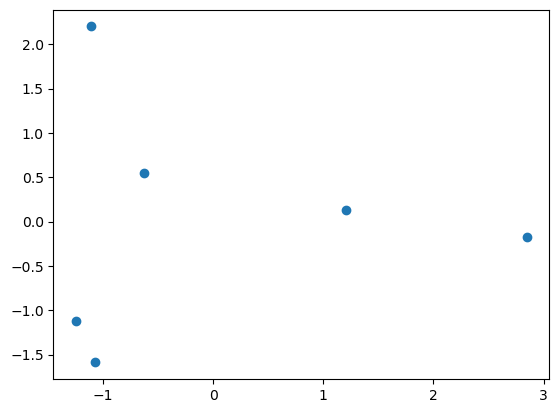

In [47]:
### Visualisation des embeddings
embeddings_weight = embedding.weight.data.numpy()
pca = PCA(n_components=2)
embeddings_pca = pca.fit_transform(embeddings_weight)


plt.scatter(embeddings_pca[:, 0], embeddings_pca[:, 1])
plt.show()

### <span style="color:#011C5D">9. Créer votre package python </span>

    - Step 1 : Créer un fichier analyse_exploratoire.py
    - Step 2 : Copier toutes les fonctions de ce notebook dans votre fichier fichier analyse_exploratoire.py
    - Step 3 : Créer un dossier src
    - Step 4 : Deplacer votre fichier analyse_exploratoire.py dans le dossier src
    - Step 5 : Créer un nouveau notebook
    - Step 6 : Dans ce notebook, specifier le chemin vers votre dossier src
    - Step 7 : Executer 'from  analyse_exploratoire import is_outlier, display_missing_values etc...
    - Step 8 : Analyser vos données avec ces nouvelles fonction

## Ressources

Imputation:

- [Imputation Iterrative](https://scikit-learn.org/stable/auto_examples/impute/plot_iterative_imputer_variants_comparison.html) 
- [Imputation](https://scikit-learn.org/stable/modules/impute.html) 

Outliers:

- [Doc sklearn](https://scikit-learn.org/stable/modules/outlier_detection.html)
- [Doc Medium](https://towardsdatascience.com/5-outlier-detection-methods-that-every-data-enthusiast-must-know-f917bf439210)